# 6. Decision Trees & Random Forests

**Decision Trees (DTs)** are a non-parametric（no need to perform much preprocessing and adapt to any form of datasets） supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.It is very explainable and effective to work with different engineering problems in industry. Many applications like random forest and adaboost are typical descision tree-based approaches.



![logit](figures/dt.PNG)

- Video [Decision Tree explained](https://www.youtube.com/watch?v=JcI5E2Ng6r4).

- Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.
- In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches.
- The decisions or the test are performed on the basis of features of the given dataset.
- It is a graphical representation for getting all the possible solutions to a problem/decision based on given conditions.
- It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.
- In order to build a tree, we use the CART algorithm, which stands for Classification and Regression Tree algorithm.
- A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.
- Below diagram explains the general structure of a decision tree:

![leaf](figures/leaf.png)

- Root Node: It represents the entire population or sample and this further gets divided into two or more homogeneous sets.
- Splitting: It is a process of dividing a node into two or more sub-nodes.
- Decision Node: When a sub-node splits into further sub-nodes, then it is called the decision node.
- Leaf / Terminal Node: Nodes do not split is called Leaf or Terminal node.
- Pruning: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
- Branch / Sub-Tree: A subsection of the entire tree is called branch or sub-tree.
- Parent and Child Node: A node, which is divided into sub-nodes is called a parent node of sub-nodes whereas sub-nodes are the child of a parent node.

### Assumptions while creating Decision Tree

Below are some of the assumptions we make while using Decision tree:

In the beginning, the whole training set is considered as the root.
Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
Records are distributed recursively on the basis of attribute values.
Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
Decision Trees follow Sum of Product (SOP) representation. The Sum of product (SOP) is also known as Disjunctive Normal Form. For a class, every branch from the root of the tree to a leaf node having the same class is conjunction (product) of values, different branches ending in that class form a disjunction (sum).

The primary challenge in the decision tree implementation is to identify which attributes do we need to consider as the root node and each level. Handling this is to know as the attributes selection. We have different attributes selection measures to identify the attribute which can be considered as the root note at each level.

### How it works

In a decision tree, for predicting the class of the given dataset, the algorithm starts from the root node of the tree. This algorithm compares the values of root attribute with the record (real dataset) attribute and, based on the comparison, follows the branch and jumps to the next node.

For the next node, the algorithm again compares the attribute value with the other sub-nodes and move further. It continues the process until it reaches the leaf node of the tree. The complete process can be better understood using the below algorithm:

- Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
- Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
- Step-3: Divide the S into subsets that contains possible values for the best attributes.
- Step-4: Generate the decision tree node, which contains the best attribute.
- Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.


Example: Suppose there is a candidate who has a job offer and wants to decide whether he should accept the offer or Not. So, to solve this problem, the decision tree starts with the root node (Salary attribute by ASM). The root node splits further into the next decision node (distance from the office) and one leaf node based on the corresponding labels. The next decision node further gets split into one decision node (Cab facility) and one leaf node. Finally, the decision node splits into two leaf nodes (Accepted offers and Declined offer). Consider the below diagram:

![leaf](figures/branch.png)

The ID3 algorithm builds decision trees using a top-down greedy search approach through the space of possible branches with no backtracking. A greedy algorithm, as the name suggests, always makes the choice that seems to be the best at that moment.

Steps in ID3 algorithm:

- It begins with the original set S as the root node.
- On each iteration of the algorithm, it iterates through the very unused attribute of the set S and calculates Entropy(H) and Information gain(IG) of this attribute.
- It then selects the attribute which has the smallest Entropy or Largest 0 -- Information gain.
- The set S is then split by the selected attribute to produce a subset of the data.
- The algorithm continues to recur on each subset, considering only attributes never selected before.

### Attribute Selection Measures

While implementing a Decision tree, the main issue arises that how to select the best attribute for the root node and for sub-nodes. So, to solve such problems there is a technique which is called as Attribute selection measure or ASM. By this measurement, we can easily select the best attribute for the nodes of the tree. There are two popular techniques for ASM, which are:

Information Gain
Gini Index
1. Information Gain:
Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute.
It calculates how much information a feature provides us about a class.
According to the value of information gain, we split the node and build the decision tree.
A decision tree algorithm always tries to maximize the value of information gain, and a node/attribute having the highest information gain is split first. It can be calculated using the below formula:

### The Gini score

- $G_i = 1- \sum_{k=1}^K {p_{i, k}}^2$
- $p_{i, k}$: ratio of class `k` instances in the $i^{th}$ node.
- $Gini = 0$: all samples it applies to belong to the same class ("pure" node).

Other possible measure: *entropy* (level of disorder).

### Example: Gini scores for the trained Decision Tree

- Root node:

$$G_0 = 1 - ((\frac{50}{150})^2 + (\frac{50}{150})^2 + (\frac{50}{150})^2) = 1 - (\frac{1}{9} + \frac{1}{9} + \frac{1}{9}) = \frac{2}{3}$$

- Depth 1, left node:

$$G_1 = 1 - ((\frac{50}{50})^2 + (\frac{0}{50})^2 + (\frac{0}{50})^2) = 1 - (1 + 0 + 0) = 0$$

- Depth 2, left node:

$$G_3 = 1 - ((\frac{0}{54})^2 + (\frac{49}{54})^2 + (\frac{5}{54})^2) \simeq 0.168$$

### Example: training a Decision Tree on planar data

Three classes with 3 samples each, two features $x$ and $y$.



$G_{initial} = 1 - ((\frac{3}{9})^2 + (\frac{3}{9})^2 + (\frac{3}{9})^2) = \frac{2}{3}$

Impurity gain with $x=0.4$:

- $G_{left|x=0.4} = 1 - ((\frac{1}{1})^2 + (\frac{0}{1})^2 + (\frac{0}{1})^2) = 0\;\;G_{right|x=0.4} = 1 - ((\frac{2}{8})^2 + (\frac{3}{8})^2 + (\frac{3}{8})^2) = \frac{21}{32}$
- $Gain_{x=0.4} = G_{initial} - (\frac{1}{9}G_{left|x=0.4} + \frac{8}{9}G_{right|x=0.4}) = \frac{2}{3} - \frac{7}{12} = \frac{1}{12}$

Impurity gain with $x=2$:

- $G_{left|x=2} = 1 - ((\frac{3}{6})^2 + (\frac{3}{6})^2 + (\frac{0}{6})^2) = 0,5\;\;G_{right|x=2} = 1 - ((\frac{0}{3})^2 + (\frac{0}{3})^2 + (\frac{3}{3})^2) = 0$
- $Gain_{x=2} = G_{initial} - (\frac{6}{9}G_{left|x=2} + \frac{3}{9}G_{right|x=2}) = \frac{2}{3} - \frac{1}{3} = \frac{1}{3}$

- Blog [Decision Tree Algorithm, Explained](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html)

- Video [How to find Entropy Information Gain | Gini Index Splitting Attribute Decision Tree](https://www.youtube.com/watch?v=wefc_36d5mU).

## Environment setup

In [1]:
import platform

print(f"Python version: {platform.python_version()}")
assert platform.python_version_tuple() >= ("3", "6")

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import pandas as pd
import graphviz

Python version: 3.7.5


In [2]:
# Setup plots
%matplotlib inline
plt.rcParams["figure.figsize"] = 10, 8
%config InlineBackend.figure_format = 'retina'
sns.set()

In [3]:
import sklearn

print(f"scikit-learn version: {sklearn.__version__}")

from sklearn.datasets import load_iris
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    plot_tree,
    export_graphviz,
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

scikit-learn version: 0.22.1


In [4]:
# Plot the decision boundary for a model using 2 features
# Taken from https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb
def plot_iris_decision_boundary(
    model, X, y, axes=[0, 7.5, 0, 3], legend=True, plot_training=True
):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = model.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#a0faa0", "#9898ff"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris versicolor")
        plt.plot(X[:, 0][y == 2], X[:, 1][y == 2], "bs", label="Iris virginica")
        plt.axis(axes)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

## Decision Trees

(Heavily inspired by Chapter 6 of [Hands-On Machine Learning](https://github.com/ageron/handson-ml2) by Aurélien Géron)

### Decision Trees in a nutshell

- Supervised method, used for classification or regression.
- Build a tree-like structure based on a series of questions on the data.

[![Decision Tree Example](images/dt_pdsh.png)](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html)

### Example: training a Decision Tree to classify flowers

[Iris](https://archive.ics.uci.edu/ml/datasets/iris) is a well-known multiclass dataset. It contains 3 classes of flowers with 50 samples each. There are a total of 4 features for each sample:

- sepal length
- sepal width
- petal length
- petal width

In [5]:
# Load the Iris dataset
iris = load_iris()

# Put it into a DataFrame for visualization purposes
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# Add target and class columns to DataFrame
df_iris["target"] = iris.target
df_iris["class"] = iris.target_names[iris.target]
# Show 10 random samples
df_iris.sample(n=10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
145                6.7               3.0                5.2               2.3   
80                 5.5               2.4                3.8               1.1   
113                5.7               2.5                5.0               2.0   
120                6.9               3.2                5.7               2.3   
126                6.2               2.8                4.8               1.8   
96                 5.7               2.9                4.2               1.3   
38                 4.4               3.0                1.3               0.2   
81                 5.5               2.4                3.7               1.0   
88                 5.6               3.0                4.1               1.3   
0                  5.1               3.5                1.4               0.2   

     target       class  
145       2   virginica  
80        1  versicolor  
113       2   virginica  
120       2   virginica  
126       2   virginica  
96        1  versicolor  
38        0      setosa  
81        1  versicolor  
88        1  versicolor  
0         0      setosa

In [6]:
# Use only last two features (petal length and width)
# Thus, we can plot a 2D decision boundary

x_train_2feat = iris.data[:, 2:]
y_train_2feat = iris.target

print(f"x_train: {x_train_2feat.shape}")
print(f"y_train: {y_train_2feat.shape}")

x_train: (150, 2)
y_train: (150,)


In [7]:
# Train a DT on the simplified dataset
dt_model = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_model.fit(x_train_2feat, y_train_2feat)

# Compute accuracy on training set
acc = dt_model.score(x_train_2feat, y_train_2feat)
print(f"Training accuracy: {acc:.5f}")

Training accuracy: 0.96000


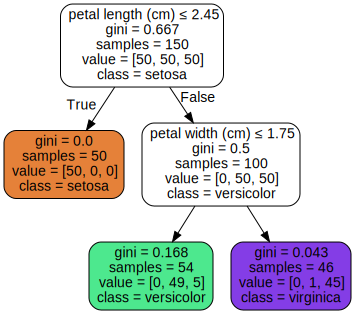

In [8]:
# Plot the DT
# If using Jupyter locally, install graphviz with this command: conda install python-graphviz
dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    special_characters=True,
)
graphviz.Source(dot_data)

### Tree nodes

Each node is a step in the decision process, starting with the *root node* (depth 0). Leaf nodes represent predictions of the model.

Node attributes are:

- **Gini**: measure of the node *impurity*.
- **Samples**: number of samples the node applies to.
- **Value**: number of samples of each class the node applies to.

### Example: decision boundaries for the trained Decision Tree

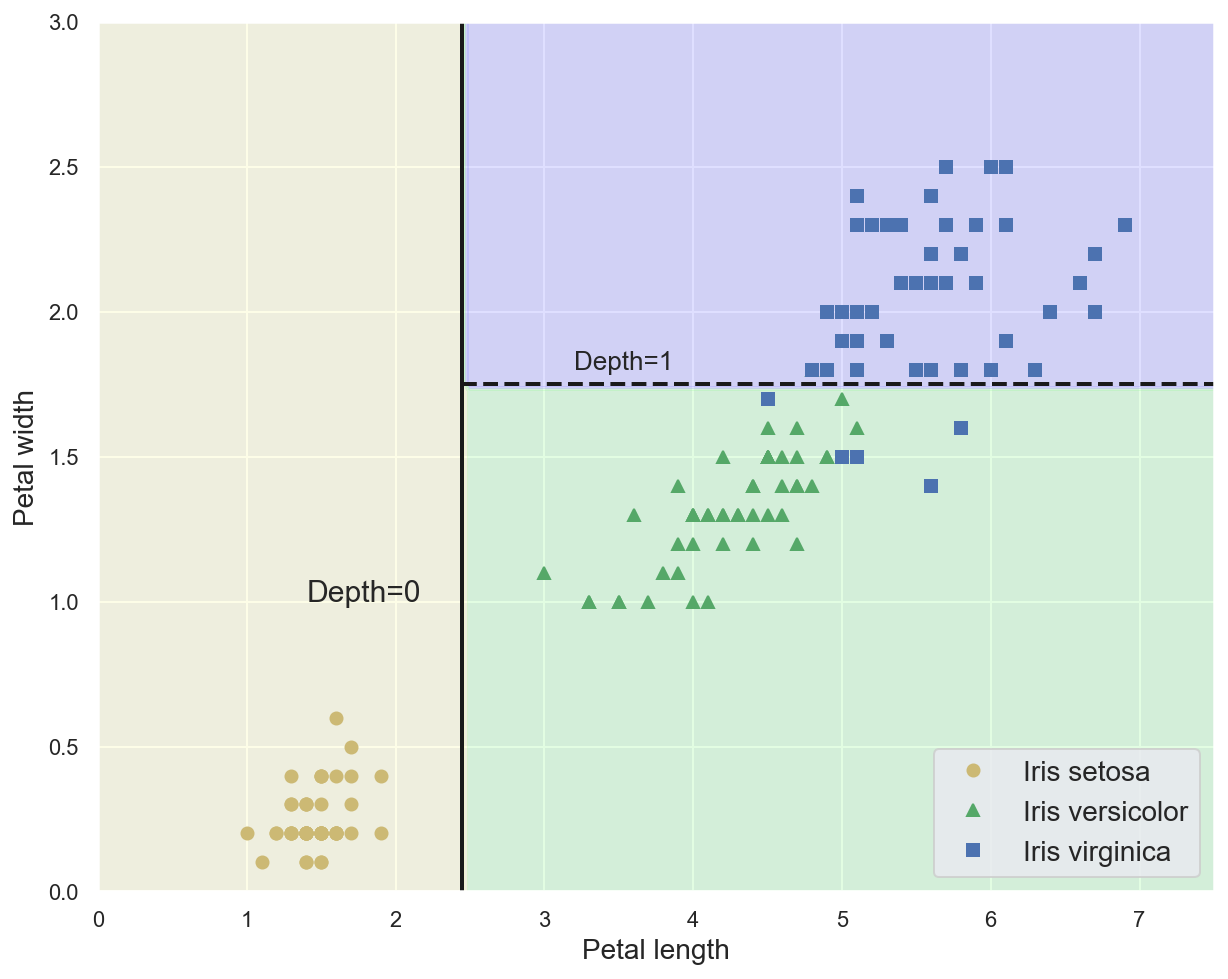

In [9]:
plot_iris_decision_boundary(dt_model, x_train_2feat, y_train_2feat)
# Plot separation lines
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()

### Using a Decision Tree for predictions

1. Using the new sample data, the tree is traversed to find the leaf node for that sample.
1. Class probabilities are the ratios of samples of each class for this node.

In [10]:
# Define some new flower data
x_new = [[5, 1.5]]

# Print predicted class probabilities
# 0/54 for "setosa", 49/54 for "versicolor", 5/54 for "virginica"
print(dt_model.predict_proba(x_new))

# Print predicted class
print(iris.target_names[dt_model.predict(x_new)])

[[0.         0.90740741 0.09259259]]
['versicolor']


### The training process

The CART (*Classification And Regression Tree*) algorithm creates binary trees.

At each depth, it looks for the highest *Gini gain* by finding the feature and the threshold that produces the *purest* subsets (weighted by their size). Then, its splits the subsets recursively according to the same logic.

It stops once no split will further reduce impurity, or when it reaches the maximum depth.

### Decision Trees for regression problems

Decision Tree can also perform regression tasks.

Instead of predicting a class, it outputs a value which is the average of all training samples associated with the leaf node reached during traversal.

### Example: fitting a sine curve with a Decision Tree

In [11]:
# Taken from https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Create a random dataset
rng = np.random.RandomState(1)
x_sin = np.sort(5 * rng.rand(80, 1), axis=0)
y_sin = np.sin(x_sin).ravel()
y_sin[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression DT
dt_reg_model1 = DecisionTreeRegressor(max_depth=2)
dt_reg_model1.fit(x_sin, y_sin)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

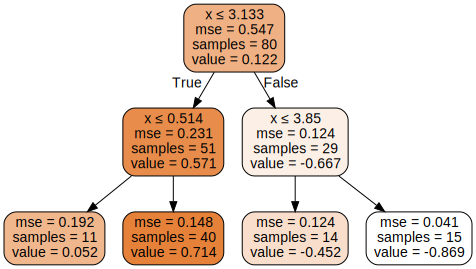

In [12]:
# Plot the DT
# If using Jupyter locally, install graphviz with this command: conda install python-graphviz
dot_data = export_graphviz(
    dt_reg_model1,
    out_file=None,
    feature_names=["x"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graphviz.Source(dot_data)

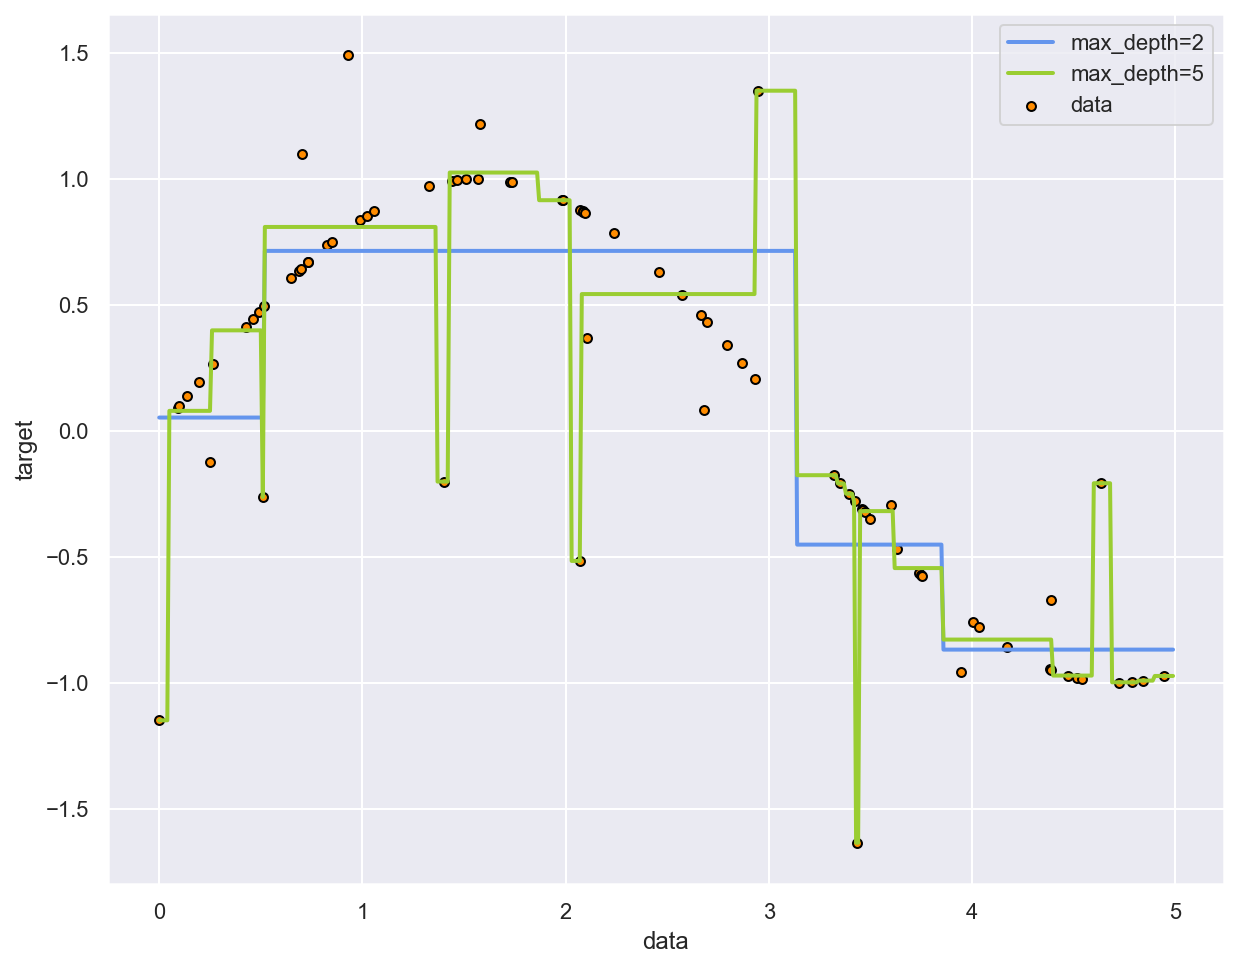

In [13]:
# Train another regression DT on same dataset
dt_reg_model2 = DecisionTreeRegressor(max_depth=5)
dt_reg_model2.fit(x_sin, y_sin)

# Predict values for both DT
x_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred_1 = dt_reg_model1.predict(x_test)
y_pred_2 = dt_reg_model2.predict(x_test)

# Plot the results
plt.figure()
plt.scatter(x_sin, y_sin, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x_test, y_pred_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(x_test, y_pred_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()

### Advantages of Decision Trees

- Versatility
- Very fast inference
- Intuitive and interpretable (*white box*)
- No feature scaling or encoding required

### Decision Trees shortcomings

- Main problem: **overfitting**. Regularization is possible through hyperparameters:
    - Maximum depth of the tree.
    - Minimum number of samples needed to split a node.
    - Minimum number of samples for any leaf node.
    - Maximum number of leaf nodes.
- Sensibility to small variations in the training data.

## Ensemble learning

(Heavily inspired by Chapter 7 of [Hands-On Machine Learning](https://github.com/ageron/handson-ml2) by Aurélien Géron)

### General idea

- Combining several predictors will lead to better results.
- A group of predictors is called an **ensemble**.
- Works best when predictors are diverse.
- Less interpretable and harder to tune than an individual predictor.

### Hard voting classifiers

[![Hard voting classifier](images/hard_voting_classifier.png)](https://github.com/ageron/handson-ml2)

### Soft voting classifiers

- Use class probabilities rather than class predictions.
- Often yields better results than hard voting (highly confident predictions have more weight).

### Bagging and pasting

Both methods train several predictors with the same algorithm on different random samples of the training set. The ensemble's result is computed by aggregating (i.e. most frequent or average) the predictions of individual predictors.

Only bagging (*bootstrap aggregating*) allows samples to be repeated for the same predictor.

[![Bagging & pasting](images/bagging_pasting.png)](https://github.com/ageron/handson-ml2)

### Boosting

Bagging and pasting methods rely on the simultaneous construction of several independent predictors.

On the contrary, boosting methods train predictors *sequentially*, each one trying to correct its predecessor.

#### AdaBoost

The core principle of AdaBoost (*Adaptative Boosting*) is to train several predictors on repeatedly modified versions of the dataset. The weights of incorrectly predicted instances are adjusted such that subsequent predictors focus more on difficult cases.

#### Gradient boosting

This methods train subsequent predictors on the *residual errors* made by the previous ones.

The ensemble's prediction is the sum of all individual predictions.

#### Example: gradient boosting for regression

In [14]:
def noisy_quadratic(x):
    return 3 * x[:, 0] ** 2 + 0.05 * np.random.randn(len(x))

# Generate a noisy quadratic dataset
x_boost = np.random.rand(100, 1) - 0.5
y_boost = noisy_quadratic(x_boost)


def grow_regression_tree(x, y):
    """Create and train a Decision Tree Regressor"""
    dtr_model = DecisionTreeRegressor(max_depth=2, random_state=42)
    dtr_model.fit(x, y)
    return dtr_model

In [15]:
# Train a DTR on initial dataset
dtr_model_1 = grow_regression_tree(x_boost, y_boost)
error_1 = y_boost - dtr_model_1.predict(x_boost)

# Train another DTR to predict the residual error of first DTR
dtr_model_2 = grow_regression_tree(x_boost, error_1)
error_2 = error_1 - dtr_model_2.predict(x_boost)

# Train another DTR to predict the residual error of second DTR
dtr_model_3 = grow_regression_tree(x_boost, error_2)
error_3 = error_2 - dtr_model_2.predict(x_boost)

In [16]:
# Generate test input and target
x_test = np.array([[0.05]])
y_test = noisy_quadratic(x_test)

# Compute error of first predictor
y_pred_1 = dtr_model_1.predict(x_test)
print(f"First DTR error: {abs(y_test - y_pred_1)}")

# Compute error of boosted ensemble
y_pred_ens = sum(dtr_model.predict(x_test) for dtr_model in (dtr_model_1, dtr_model_2, dtr_model_3))
print(f"Boosted ensemble error: {abs(y_test - y_pred_ens)}")

First DTR error: [0.1301599]
Boosted ensemble error: [0.04451791]


In [17]:
def plot_predictions(
    regressors, x, y, axes, label=None, style="r-", data_style="b.", data_label=None
):
    """Plot dataset and sum of predictions for one or several regressor(s)"""

    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(x[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

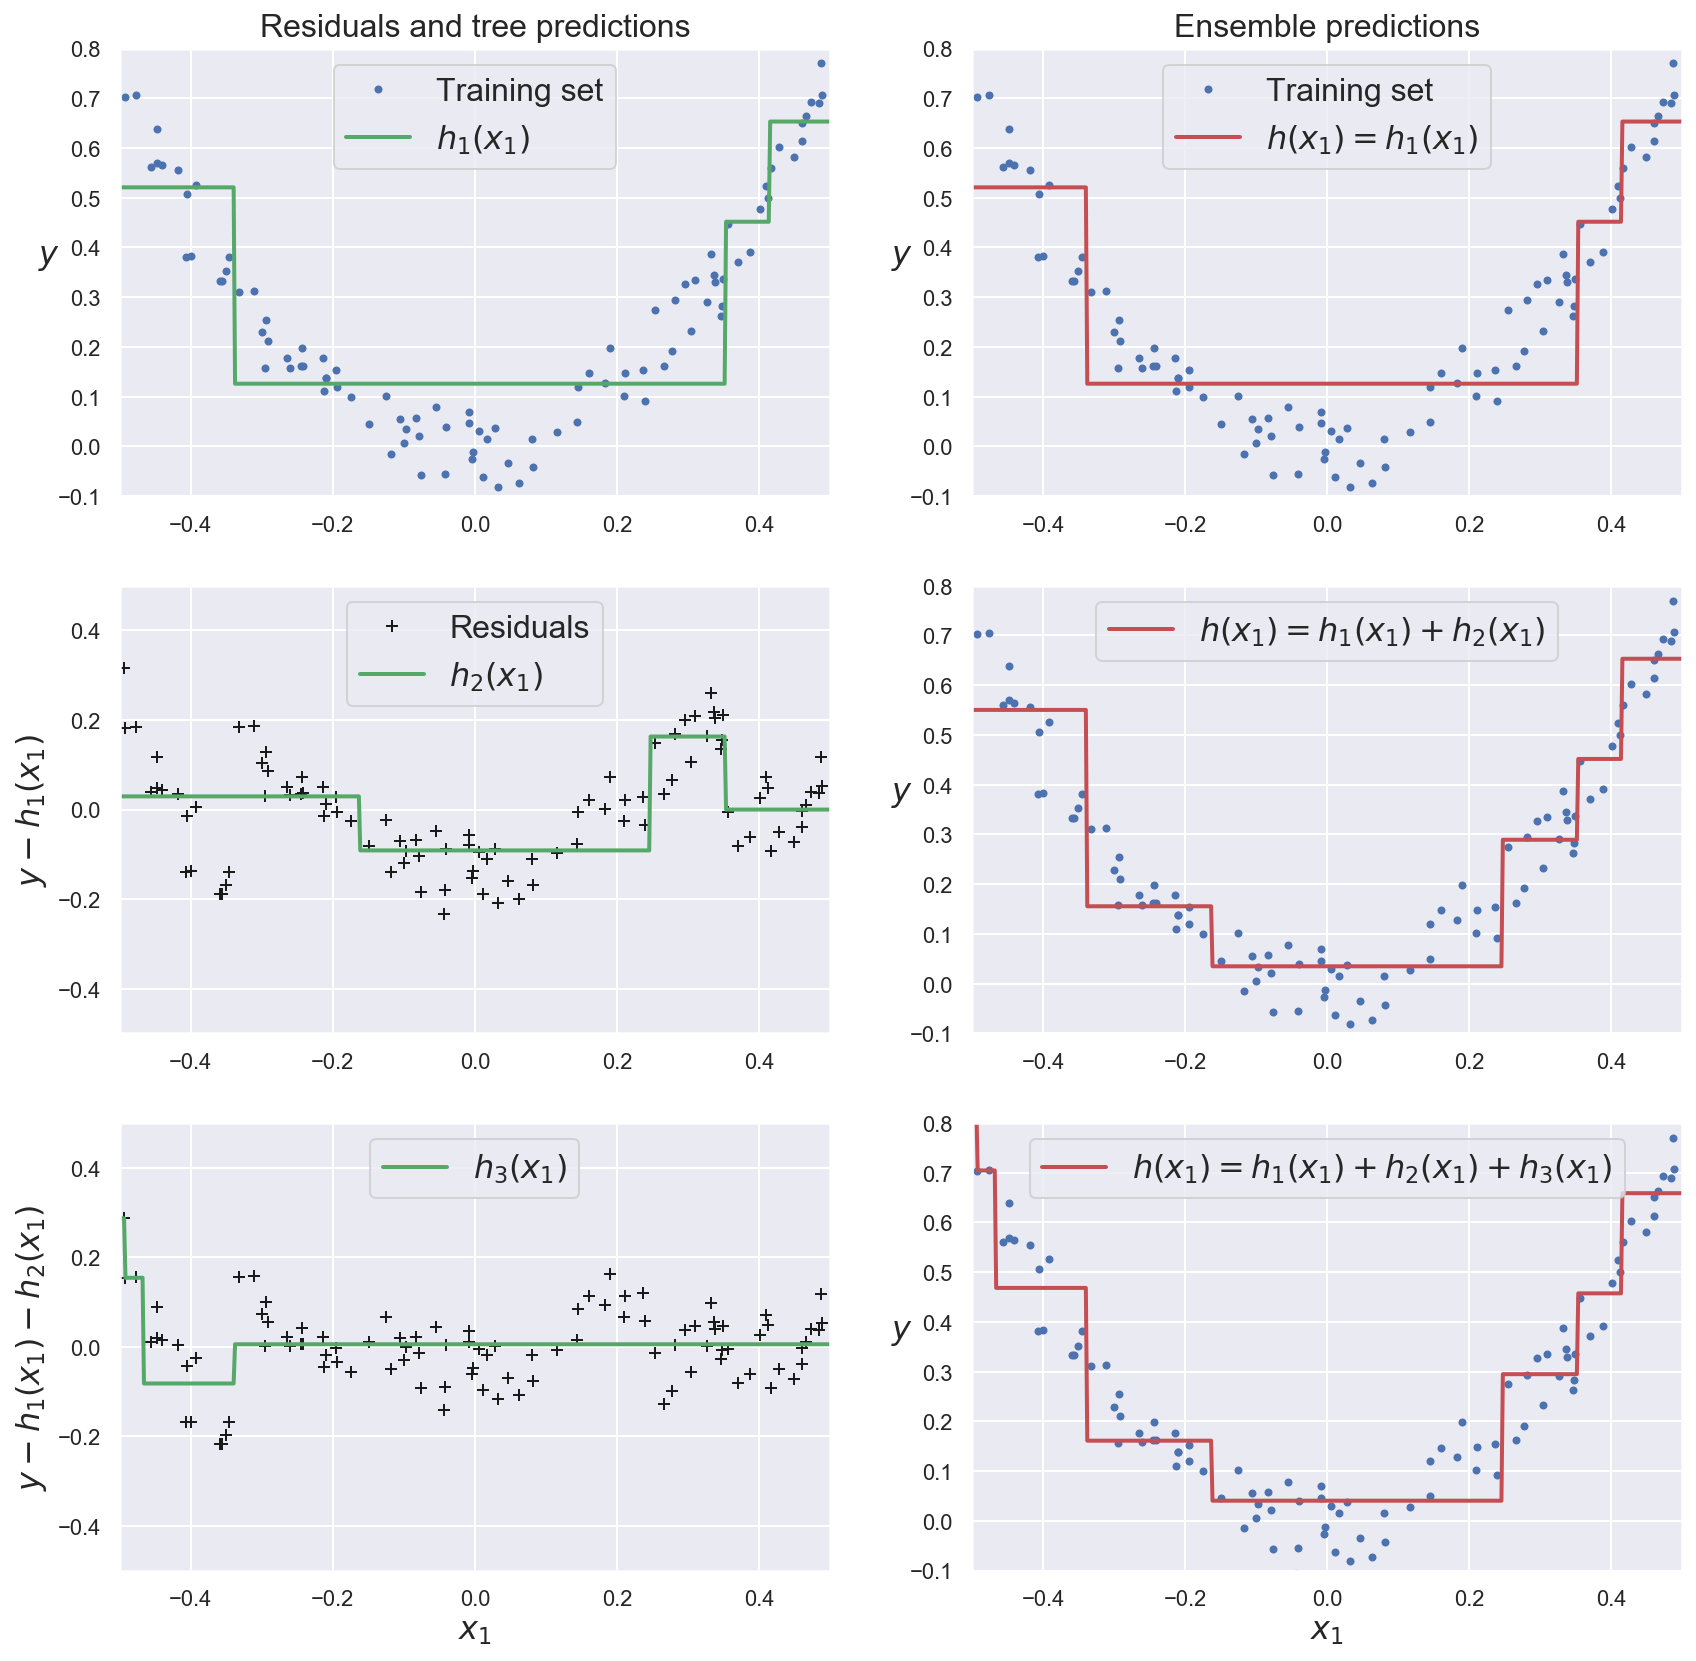

In [18]:
plt.figure(figsize=(14,14))

plt.subplot(321)
plot_predictions([dtr_model_1], x_boost, y_boost, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([dtr_model_1], x_boost, y_boost, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([dtr_model_2], x_boost, error_1, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([dtr_model_1, dtr_model_2], x_boost, y_boost, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([dtr_model_3], x_boost, error_2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([dtr_model_1, dtr_model_2, dtr_model_3], x_boost, y_boost, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

## Random Forests

### Random Forests in a nutshell

- Ensemble of Decision Trees, generally trained via bagging.
- May be used for classification or regression.
- Trees are grown using a random subset of features.
- Ensembling mitigates the individual shortcomings of Decision Trees (overfitting, sensibility to small changes in the dataset).
- On the other hand, results are less interpretable.

### Example: training a Random Forest to classify flowers

In [19]:
# Use whole Iris dataset
x_train = iris.data
y_train = iris.target

# Create a Random Forest classifier
# n_estimators: number of predictors (Decision Trees)
rf_model = RandomForestClassifier(n_estimators=200)

# Train the RF on the dataset
rf_model.fit(x_train, y_train)

# Compute cross-validation scores for the RF
scores = cross_val_score(rf_model, x_train, y_train, cv=5)

cv_acc = scores.mean()
print(f"Mean CV accuracy: {cv_acc:.05f}")

Mean CV accuracy: 0.96000
